## Instruments and pricing engines

Setup

First pricing method: analytic Black-Scholes formula

In [37]:
from QuantLib import *

# Define the option
maturity_date = Date(15, 1, 2025)
spot_price = 100
strike_price = 100
volatility = 0.20  # the historical vols for a year
risk_free_rate = 0.01
dividend_rate = 0.02

# Option type
option_type = Option.Call
exercise = EuropeanExercise(maturity_date)
payoff = PlainVanillaPayoff(option_type, strike_price)
option = VanillaOption(payoff, exercise)

# Market data
spot_handle = QuoteHandle(SimpleQuote(spot_price))
flat_ts = YieldTermStructureHandle(FlatForward(0, TARGET(), risk_free_rate, Actual360()))
dividend_yield = YieldTermStructureHandle(FlatForward(0, TARGET(), dividend_rate, Actual360()))
flat_vol_ts = BlackVolTermStructureHandle(BlackConstantVol(0, TARGET(), volatility, Actual360()))


bs_process = BlackScholesMertonProcess(spot_handle, dividend_yield, flat_ts, flat_vol_ts)


engine = AnalyticEuropeanEngine(bs_process)
option.setPricingEngine(engine)


option_price = option.NPV()
print(f"The option price is: {option_price}")


The option price is: 17.698227839595344


In [43]:
print(option.delta())
print(option.gamma())
print(option.vega())

0.45397905183641285
0.004754495460641294
104.7837971798001


# Market Changes

In [44]:
u.setValue(105.0)
print(option.NPV())

17.698227839595344


In [45]:
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import utils

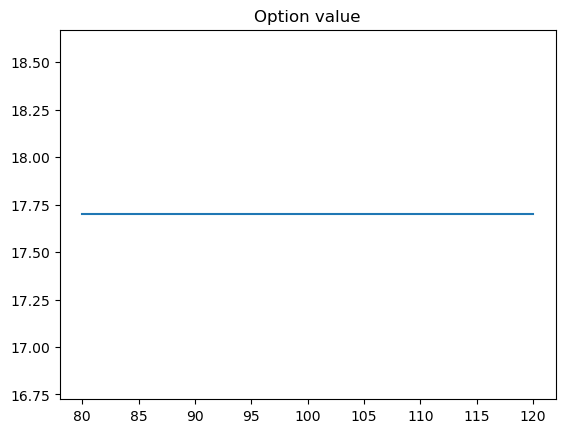

In [46]:
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

# Assuming 'utils' contains functions for plotting, it's likely you intended to use matplotlib's plotting capabilities directly
# If 'utils' is a custom module and 'plot' is intended to be a function within it, ensure that it's defined in the module.
# Replace the call to 'utils.plot()' with the following:

fig, ax = plt.subplots()  # Create a figure and axes using matplotlib

# define xs and ys here so they can be used in the plotting code
xs = np.linspace(80.0, 120.0, 400)
ys = []
# ... (rest of your code) ...

for x in xs:
    u.setValue(x)
    ys.append(option.NPV())
    
# Move plotting outside the loop to plot after all data points are collected
ax.set_title('Option value')  
# utils.highlight_x_axis(ax)  # If 'highlight_x_axis' exists in 'utils', you can keep this line, otherwise, consider removing it or implementing it using matplotlib functionality
ax.plot(xs, ys)  # Use matplotlib's plot function

plt.show()  # Display the plot

In [47]:
u.setValue(105.0)
r.setValue(0.01)
sigma.setValue(0.20)

In [48]:
print(option.NPV())

17.698227839595344


In [49]:
r.setValue(0.03)

In [50]:
print(option.NPV())

17.698227839595344


In [51]:
sigma.setValue(0.25)

In [52]:
print(option.NPV())

17.698227839595344
